<a href="https://colab.research.google.com/github/Calcious98/TIL/blob/master/002_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification - 분류

Confusion Matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정

* pandas DataFrame
 * Default.csv - 신용카드 데이터

In [ ]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


sklearn은 x만 문자로 받지 않고 y는 숫자 문자 다 받는다

- y = default 
- x = balance 

# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [ ]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

> ## 2) 분포 시각화

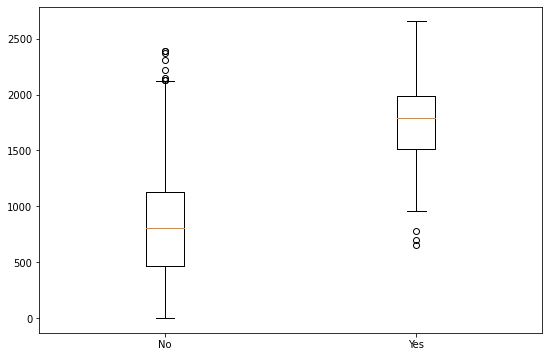

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.default == 'No'].balance,
             DF[DF.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()

# II. Data Preprocessing

> ## 1) X, y

In [ ]:
X = DF[['balance']]
y = DF['default']

> ## 2) Train & Test Split

* 7: 3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# III. Modeling

> ## 1) Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

> ## 2) Test_Data에 Model 적용

In [ ]:
y_hat = Model_lr.predict(X_test)

* y_hat

In [ ]:
y_hat 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# IV. Model Validation

> ## 1) Confusion Matrix

* 'No'(상환) 기준

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]])

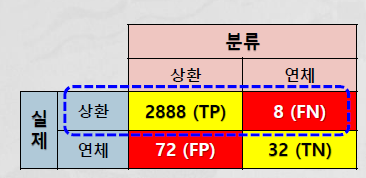

positive랑 negative랑 반대로 되어있다

* 'Yes'(연체)(positive) 기준  --> labels을 지정해 줘라

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]])

> ## 2) Accuracy, Precision, Recall - 'No(상환)'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


> ## 3) Accuracy, Precision, Recall - 'Yes(연체)'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


> ## 4) F1_Score - 'No(상환)'

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

> ## 5) F1_Score - 'Yes(연체)'

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

> ## 6) Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



# 
# 
# 
# The End
# 
# 
# 